In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 07

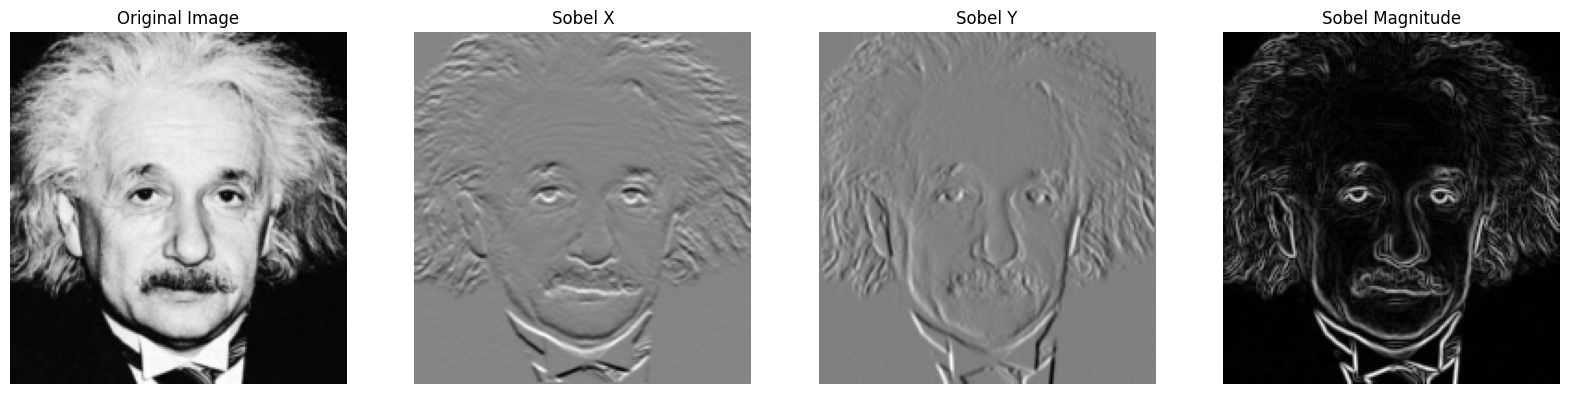

In [3]:
image = cv.imread('images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert f is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) #Sobel Vertical
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) #Sobel Horizontal

g_x = cv.filter2D(image, cv.CV_32F, sobel_x) 
g_y = cv.filter2D(image, cv.CV_32F, sobel_y) 
g_mag = np.sqrt(g_x**2 + g_y**2)

# Plot
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].axis('off')
ax[2].imshow(g_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].axis('off')
ax[3].imshow(g_mag, cmap='gray')
ax[3].set_title('Sobel Magnitude')
ax[3].axis('off')
plt.show()


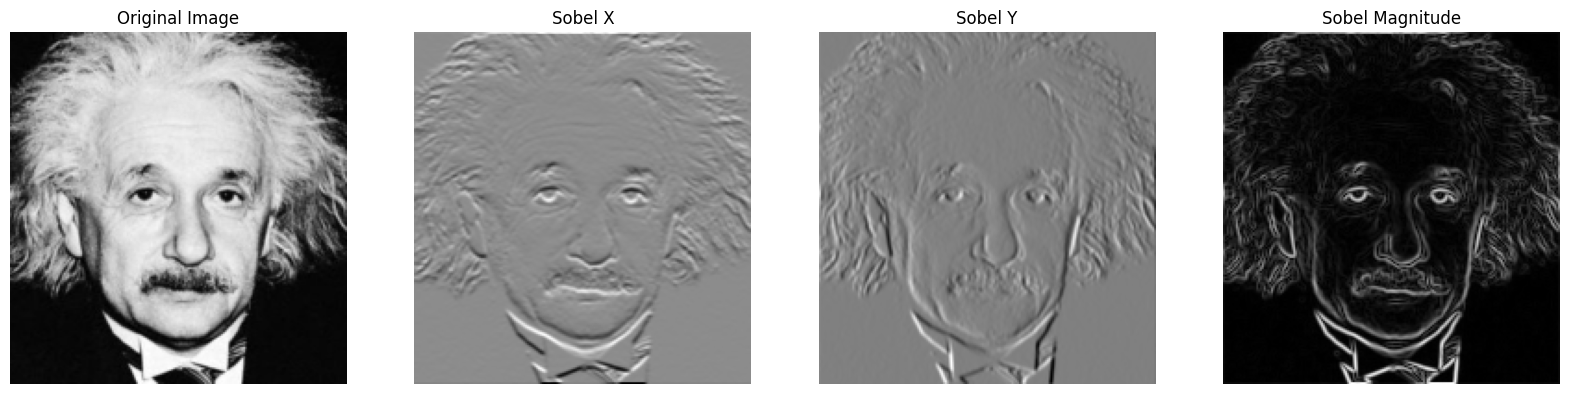

In [6]:
# My own code

def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

# padding
height, width = image.shape
padded_image = np.zeros((height+2, width+2))
padded_image[1:-1, 1:-1] = image

# Convolution
g_x = convolution2d(padded_image, sobel_x)
g_y = convolution2d(padded_image, sobel_y)
g_mag = np.sqrt(g_x**2 + g_y**2)

# Plot
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].axis('off')
ax[2].imshow(g_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].axis('off')
ax[3].imshow(g_mag, cmap='gray')
ax[3].set_title('Sobel Magnitude')
ax[3].axis('off')
plt.show()


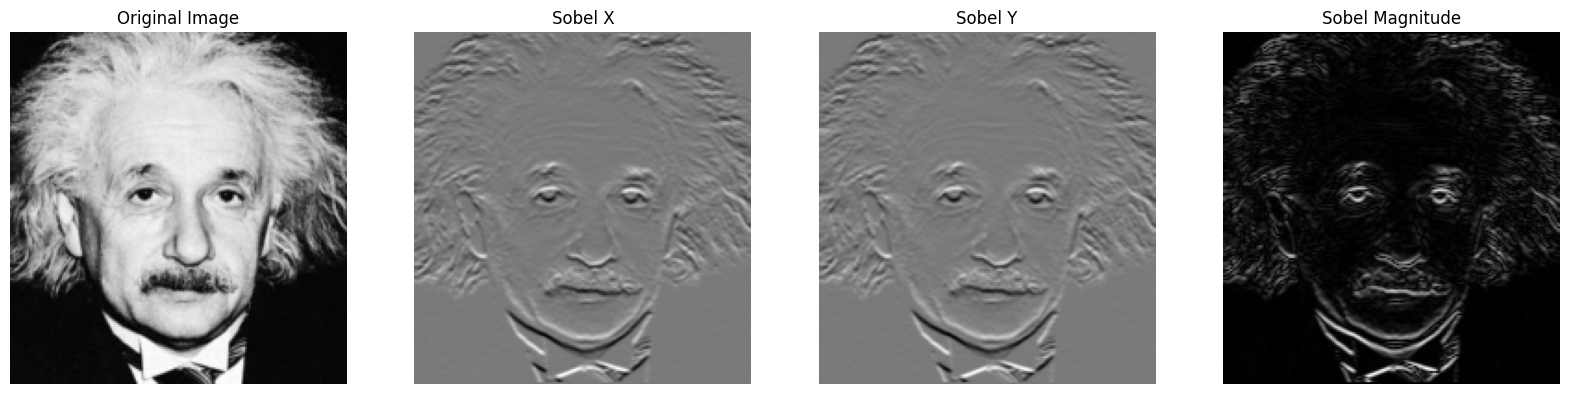

In [9]:
# Using the property of separability of the Sobel operator

sobel_v = np.array([[1, 2, 1]], dtype=np.float32)
sobel_h = np.array([[1], [0], [-1]], dtype=np.float32)

g_x = cv.filter2D(image, cv.CV_32F, sobel_v)
g_x = cv.filter2D(g_x, cv.CV_32F, sobel_h)
g_y = cv.filter2D(image, cv.CV_32F, sobel_h)
g_y = cv.filter2D(g_y, cv.CV_32F, sobel_v)
g_mag = np.sqrt(g_x**2 + g_y**2)

# Plot
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].axis('off')
ax[2].imshow(g_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].axis('off')
ax[3].imshow(g_mag, cmap='gray')
ax[3].set_title('Sobel Magnitude')
ax[3].axis('off')
plt.show()

Question 08

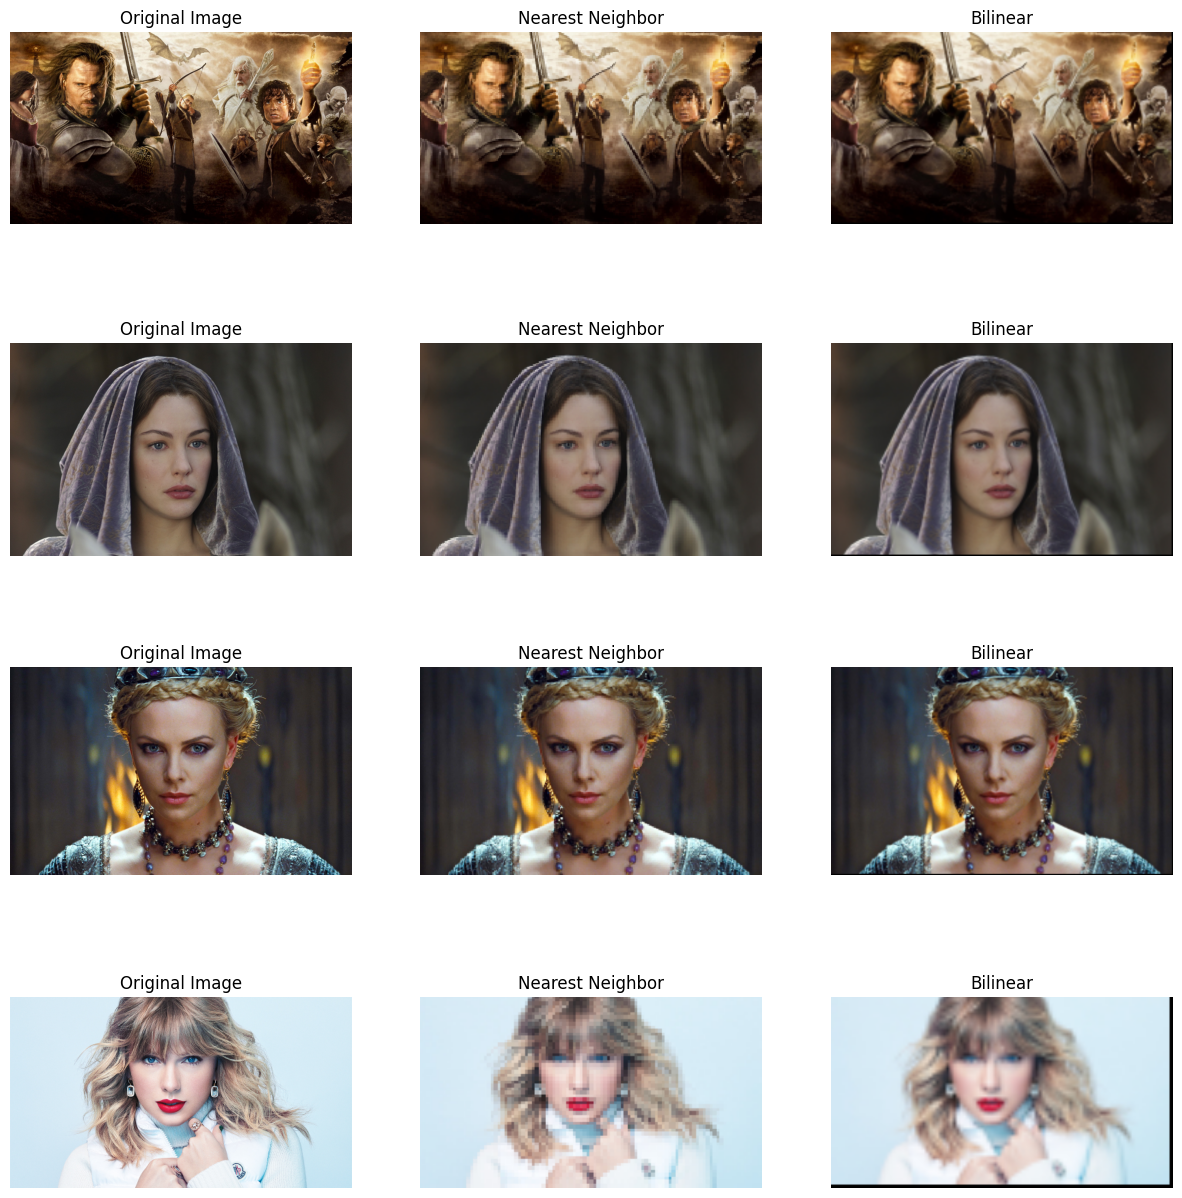

Normalized SSD for Nearest Neighbor and Bilinear Interpolation:
Image 1: NN = 0.03, BL = 0.03
Image 2: NN = 0.02, BL = 0.03
Image 3: NN = 0.03, BL = 0.03
Image 4: NN = 0.01, BL = 0.04


In [24]:
# Nearest-neighbor
def zoomNN(image, factor):
    h, w, c = image.shape
    new_h = h*factor
    new_w = w*factor
    new_image = np.zeros((new_h, new_w, c))

    for i in range(c):
        for j in range(new_h):
            for k in range(new_w):
                new_image[j][k][i] = image[min(h-1,round(j/factor))][min(w-1,round(k/factor))][i]
    new_image = new_image.astype(np.uint8)
    return new_image

# Bilinear interpolation
def zoomBL(image, factor):
    h, w, c = image.shape
    new_h = int(h*factor)
    new_w = int(w*factor)
    new_image = np.zeros((new_h, new_w, c), dtype=np.uint8)

    for i in range(c):
        for j in range(new_h):
            for k in range(new_w):
                x = j/factor
                y = k/factor
                x1 = int(x)
                y1 = int(y)
                x2 = min(x1+1, h-1)
                y2 = min(y1+1, w-1)
                new_image[j, k, i] = (image[x1, y1, i]*(x2-x)*(y2-y) + image[x2, y1, i]*(x-x1)*(y2-y) + image[x1, y2, i]*(x2-x)*(y-y1) + image[x2, y2, i]*(x-x1)*(y-y1))
    new_image = new_image.astype(np.uint8)
    return new_image

# Zooming
small = ['im01small.png', 'im02small.png', 'im03small.png', 'taylor_small.jpg']
original = ['im01.png', 'im02.png', 'im03.png', 'taylor.jpg']   
factor = 4

normalizedSSD = []
fig, ax = plt.subplots(4, 3, figsize=(15, 16))

for i in range(4):
    small_image = cv.imread(f'images/a1q5images/{small[i]}', cv.IMREAD_REDUCED_COLOR_2)
    assert small_image is not None
    original_image = cv.imread('images/a1q5images/'+original[i], cv.IMREAD_REDUCED_COLOR_2)
    assert original_image is not None

    nn_image = zoomNN(small_image, factor)
    bl_image = zoomBL(small_image, factor)

    # Resize zoomed images to match the original using interpolation
    nn_image = cv.resize(nn_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv.INTER_LINEAR)
    bl_image = cv.resize(bl_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv.INTER_LINEAR)

    ssd_nn = np.sum((original_image.astype(np.float32) - nn_image.astype(np.float32))**2)
    ssd_bl = np.sum((original_image.astype(np.float32) - bl_image.astype(np.float32))**2)
    maximum_ssd = np.sum((original_image.astype(np.float32) - 0)**2)
    normalizedSSD.append([ssd_nn/maximum_ssd, ssd_bl/maximum_ssd])

    ax[i, 0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    ax[i, 0].set_title('Original Image')
    ax[i, 0].axis('off')
    ax[i, 1].imshow(cv.cvtColor(nn_image, cv.COLOR_BGR2RGB))
    ax[i, 1].set_title('Nearest Neighbor')
    ax[i, 1].axis('off')
    ax[i, 2].imshow(cv.cvtColor(bl_image, cv.COLOR_BGR2RGB))
    ax[i, 2].set_title('Bilinear')
    ax[i, 2].axis('off')

plt.show()

print('Normalized SSD for Nearest Neighbor and Bilinear Interpolation:')
for i in range(4):
    print('Image {}: NN = {:.2f}, BL = {:.2f}'.format(i+1, normalizedSSD[i][0], normalizedSSD[i][1]))


Qustion 09

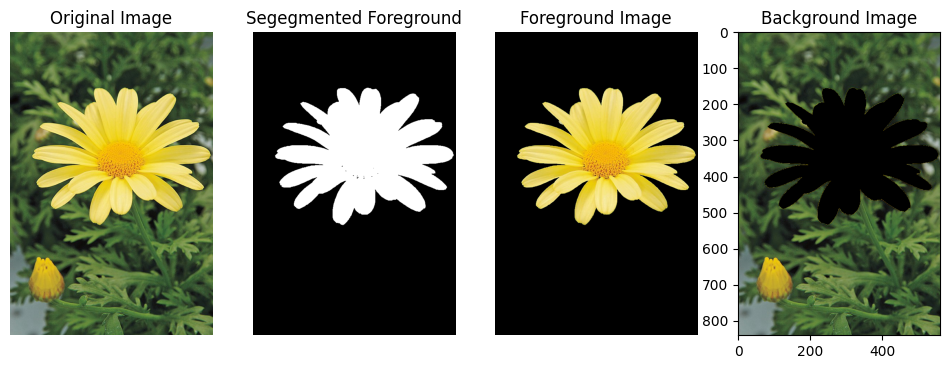

In [29]:
image = cv.imread('images/daisy.jpg')
assert image is not None

h, w, c = image.shape
mask = np.zeros((h, w), dtype=np.uint8)

# Rectangle including the daisy
rectangle = (60, 60, 500, 500)

background_model = np.zeros((1, 65), dtype=np.float64)
foreground_model = np.zeros((1, 65), dtype=np.float64)

# Rectangle initialization
cv.grabCut(image, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image_f = image*mask2[:, :, np.newaxis]

# Mask initialization
cv.grabCut(image, mask, None, background_model, foreground_model, 5, cv.GC_INIT_WITH_MASK)

mask3 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
image_b = image*mask3[:, :, np.newaxis]

# Plot
fig, ax = plt.subplots(1, 4, figsize=(12,12))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mask2, cmap='gray')
ax[1].set_title('Segegmented Foreground')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(image_f, cv.COLOR_BGR2RGB))
ax[2].set_title('Foreground Image')
ax[2].axis('off')
ax[3].imshow(cv.cvtColor(image_b, cv.COLOR_BGR2RGB))
ax[3].set_title('Background Image')
plt.show()

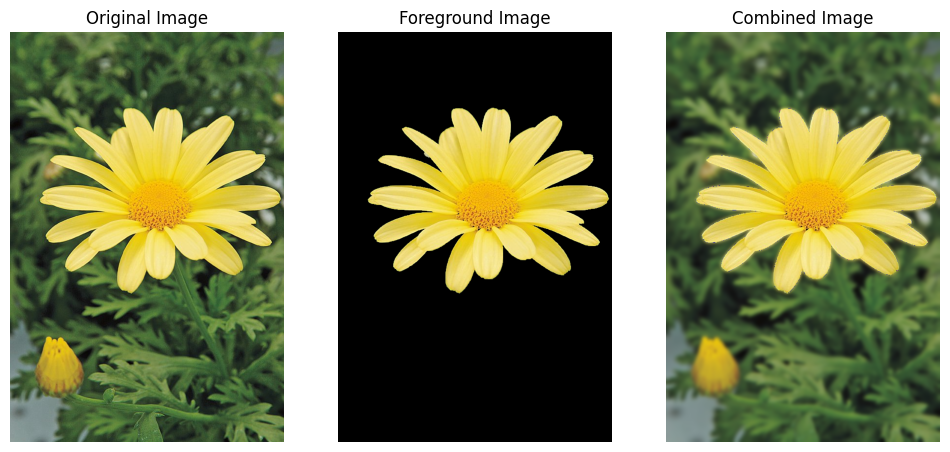

In [30]:
mask_background = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
blured_background = cv.GaussianBlur(image, (21, 21), 0, 0)

combined_image = image*mask2[:, :, np.newaxis] + blured_background*mask_background[:, :, np.newaxis]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(12,12))
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(image_f, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(combined_image, cv.COLOR_BGR2RGB))
ax[2].set_title('Combined Image')
ax[2].axis('off')
plt.show()